# Polynomial Regression Homework

## Tasks

* Generate dataset
* Split into train-test
* Implement Polynomial Regression Class 
* Implement all functions which we used in the lecture
* Search good hyperparameters for n_degree and lambda

### Generate Dataset

* Generate noise sin dataset
* Split into train test


### Implement Polynomial Regression

In [20]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [225]:
np.random.seed(64)
X = np.linspace(0, 45, 300).reshape(300, 1)
Y_line = np.sin(X)
Y = Y_line + np.random.normal(0, 1, 300).reshape(300, 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state = 64)

In [226]:
class PolynomialRegression:
    """Polynomial Regression with regularization(ridge)"""

    def __init__(self, n_degree = 2, lambda_ = None):
        """
        Init method takes n_degree and lambda_ params
        :param n_degree: (int) degree of polynomial
        :param lambda_: (float or None) None if you don't want to use regularization
        """
        self.degree = n_degree
        self.lambda_ = lambda_
        self.bettas = None

    def fit(self, X, Y):
        """
        Main fit method.
        Need to take X, transform to polynomial features, and fit linear regression(use regularization if lambda_ not None)
        Fitted bettas assign to self.bettas
        :param X: (np.array) features
        :param Y: (np.array) target
        :return: None
        """
        X_ = PolynomialFeatures(self.degree).fit_transform(X)
        
        if self.lambda_ == None:
            reg = 0
        else: reg = self.lambda_ * np.eye(len(X_[0]))
            
        self.bettas = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(X_), X_) + reg), np.transpose(X_)), Y)

    def predict(self, X):
        """
        Predict method.
        Takes X transform to polynomial features, and make predictions 
        :param X:(np.array) features
        :return:Y_pred(np.array) predictions
        """
        X_ = PolynomialFeatures(self.degree).fit_transform(X)
        
        Y_pred = np.dot(X_, self.bettas)
        return Y_pred

    def coeff(self):
        """
        Returns fitted model coefficients(bettas)
        :return: bettas(np.array)
        """
        return self.bettas
    
    def loss(self, X, Y):
        """
        This methot implements Mean Square Error Loss
        :return: Mean Square Error Loss
        """
        Y_pred = self.predict(X)
        L = ((Y - Y_pred) ** 2).sum()
        return L / (2 * len(Y))
        

In [224]:
#obj = PolynomialRegression()
#obj.fit(X_train, Y_train)
#obj.predict(X_train)
#obj.coeff()
#obj.loss(X_train, Y_train)

### Implement all functions which we used in the lecture

In [235]:
def plot_polinomial_regression(X_train, Y_train, X_test, Y_test, n_degree=2, lambda_=None):
    """
    Need to plot train, test points and fitted line(1D case only), and print train, test loss(MSE)

    :param X_train: (np.array)
    :param Y_train: (np.array)
    :param X_test: (np.array)
    :param Y_test: (np.array)
    :param n_degree: (int)
    :param lambda_: (float or None) None if you don't want to use regularization
    :return: None 
    """
    model = PolynomialRegression(n_degree)
    model.fit(X_train, Y_train)
    X_test= np.sort(X_test, axis=0)
    print(model.loss(X_train, Y_train))
    print(model.loss(X_test, Y_test))
    Y_pred = model.predict(X_test)
    plt.scatter(X_test, Y_test)
    plt.plot(X_test, Y_pred, color='r')


def plot_degree_vs_loss(X_train, Y_train, X_test, Y_test, range_= 10, lambda_ = None):
    """
    Need to iterate over over polynomial degrees fit and plot train loss vs test loss
    :param X_train: (np.array)
    :param Y_train: (np.array)
    :param X_test: (np.array)
    :param Y_test: (np.array)
    :param n_degree: (int)
    :param lambda_: (float or None) None if you don't want to use regularization
    :return: None
    """
    train_loss = []
    test_loss = []
    for i in range(1, range_):
        model = PolynomialRegression(i)
        model.fit(X_train, Y_train)
        train_loss = np.append(train_loss, model.loss(X_train, Y_train))
        test_loss = np.append(test_loss, model.loss(X_test, Y_test))
        
    plt.plot(range(1,  range_), train_loss, label = "train_loss")
    plt.plot(range(1,  range_), test_loss, label = "test_loss")
    plt.xlabel("Degree of Polynom")
    plt.ylabel("MSE Loss")
    plt.legend(loc = 0)

def plot_lambda_vs_loss(X_train, Y_train, X_test, Y_test, degree, lambda_range = [0, 3]):
    """
    Need to iterate over over polynomial degrees fit and plot train loss vs test loss
    :param X_train: (np.array)
    :param Y_train: (np.array)
    :param X_test: (np.array)
    :param Y_test: (np.array)
    :param n_degree: (int)
    :param lambda_range: (float or None) Searching space for lambda 
    :return: None
    """
    train_loss = []
    test_loss = []
    l_r = []
    #for i in range(lambda_range[0], lambda_range[1], 0.005):
    lambda_r = lambda_range[0]
    while lambda_r <=  lambda_range[1]:  
        l_r = np.append(l_r, lambda_r)
        model = PolynomialRegression(degree, lambda_r)
        model.fit(X_train, Y_train)
        train_loss = np.append(train_loss, model.loss(X_train, Y_train))
        test_loss = np.append(test_loss, model.loss(X_test, Y_test))
        lambda_r += 0.005
        
    plt.plot(l_r, train_loss, label = "train_loss")
    plt.plot(l_r, test_loss, label = "test_loss")
    plt.xlabel("Lambda of Polynom")
    plt.ylabel("MSE Loss")
    plt.legend(loc = 0)
    

0.8895773766650203
0.839825131637874


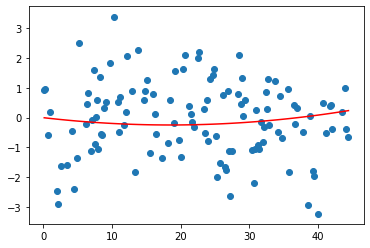

In [249]:
plot_polinomial_regression(X_train, Y_train, X_test, Y_test, n_degree = 2, lambda_ = None)

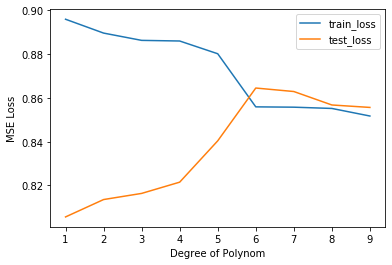

In [256]:
plot_degree_vs_loss(X_train, Y_train, X_test, Y_test, range_ = 10, lambda_ = None)

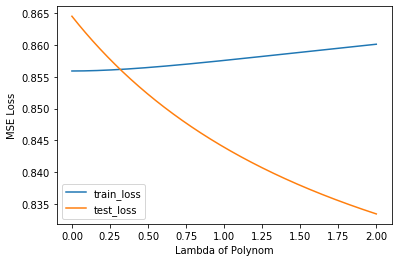

In [238]:
plot_lambda_vs_loss(X_train, Y_train, X_test, Y_test, degree = 6, lambda_range = [0,2])

### Search good hyperparameters for n_degree and lambda
### Use your implemented functions